In [3]:
#import packages
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import shapiro
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# 1. Data Preparation

## Import data

In [4]:
#load dataframe
df = pd.read_pickle('album_df.pkl')
df.dropna(inplace=True)

In [5]:
df.head()

,album_run_time_ms,number_of_tracks,std_in_energy,std_in_speechiness,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,time_signature_amax,popularity_amax,score_amax,num_markets_amax,is_explicit_amax,mode_amax,key_amax,genre
02o1jXAin1PmiYxmln4WnE,1685371.0,10.0,0.210706,0.009939,0.418500,0.080014,0.000862,-5.421200,138.344600,0.915,0.400,0.0598,0.932,175.951,4,9.0,6.8,79,False,1.0,11.0,rock
02sEJTj1sye1JaqxqpcSCp,3143823.0,14.0,0.161621,0.045708,0.601786,0.120152,0.076961,-4.511929,121.551643,0.939,0.691,0.1780,0.467,169.987,4,80.0,5.3,76,True,1.0,11.0,electronic
03CgI5yzuOcyRkkDOyCazP,1998917.0,11.0,0.123559,0.157071,0.417545,0.122944,0.315466,-8.302364,120.664545,0.855,0.320,0.4520,0.620,196.424,4,50.0,6.8,78,False,1.0,11.0,electronic
05vg15zAZuJneWQucqWaIa,1740996.0,10.0,0.053382,0.071112,0.372300,0.000115,0.111160,-4.257100,128.057000,0.943,0.323,0.2690,0.713,197.282,4,7.0,6.7,79,False,1.0,11.0,rock
06qL01wLa4kVWGloqSHDYD,1487559.0,10.0,0.104159,0.024700,0.231700,0.000754,0.775900,-6.111300,117.426500,0.979,0.643,0.1220,0.499,155.459,4,7.0,7.0,79,True,1.0,11.0,rock


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 02o1jXAin1PmiYxmln4WnE to 7xf6mmYeYnTHjPFR0BeIre
Data columns (total 22 columns):
album_run_time_ms        550 non-null float64
number_of_tracks         550 non-null float64
std_in_energy            550 non-null float64
std_in_speechiness       550 non-null float64
danceability_mean        550 non-null float64
acousticness_mean        550 non-null float64
instrumentalness_mean    550 non-null float64
loudness_mean            550 non-null float64
tempo_mean               550 non-null float64
energy_amax              550 non-null float64
liveness_amax            550 non-null float64
speechiness_amax         550 non-null float64
valence_amax             550 non-null float64
tempo_amax               550 non-null float64
time_signature_amax      550 non-null int64
popularity_amax          550 non-null float64
score_amax               550 non-null float64
num_markets_amax         550 non-null int64
is_explicit_amax         550 non-nul

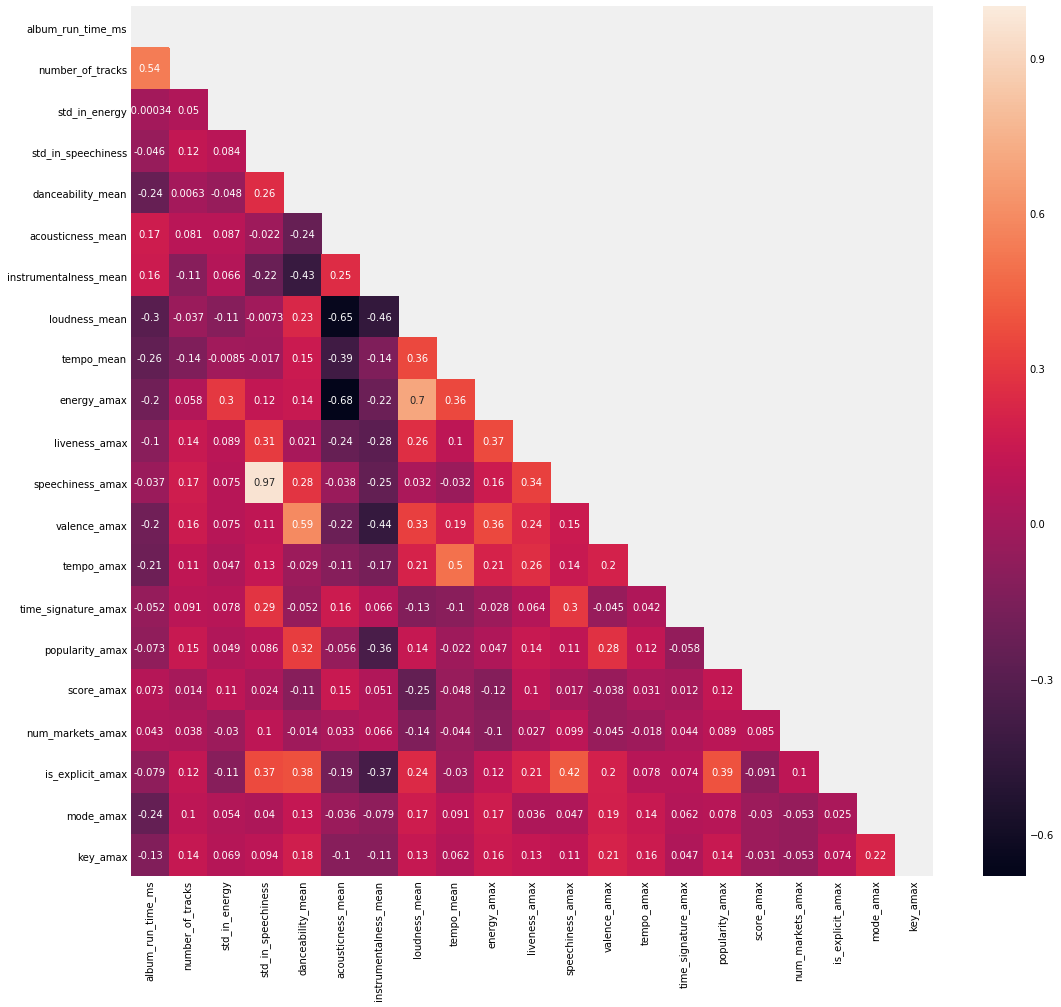

In [7]:


corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True, mask=mask)
plt.autoscale()
plt.show()

In [8]:
#get dummies for genre and explicit column
gen_dummies = pd.get_dummies(df['genre'], drop_first=True)
explicit_dummies = pd.get_dummies(df['is_explicit_amax'], prefix='explicit', drop_first=True)

In [9]:
#rename columns to avoid error
gen_dummies.rename(columns={'genre_folk/country':'Folk_Country', 'pop/r&b':'pop_rnb'}, inplace=True)

In [10]:
#create final dataframe with scaled data, dummies, and target
df_fin = pd.concat([df, gen_dummies, explicit_dummies], axis=1)

In [11]:
df_fin.dropna(inplace=True)
df_fin.drop(columns=['genre'], inplace=True)
df_fin.head()

,album_run_time_ms,number_of_tracks,std_in_energy,std_in_speechiness,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,time_signature_amax,popularity_amax,score_amax,num_markets_amax,is_explicit_amax,mode_amax,key_amax,experimental,folk/country,global,jazz,metal,pop_rnb,rap,rock,explicit_True
02o1jXAin1PmiYxmln4WnE,1685371.0,10.0,0.210706,0.009939,0.418500,0.080014,0.000862,-5.421200,138.344600,0.915,0.400,0.0598,0.932,175.951,4,9.0,6.8,79,False,1.0,11.0,0,0,0,0,0,0,0,1,0
02sEJTj1sye1JaqxqpcSCp,3143823.0,14.0,0.161621,0.045708,0.601786,0.120152,0.076961,-4.511929,121.551643,0.939,0.691,0.1780,0.467,169.987,4,80.0,5.3,76,True,1.0,11.0,0,0,0,0,0,0,0,0,1
03CgI5yzuOcyRkkDOyCazP,1998917.0,11.0,0.123559,0.157071,0.417545,0.122944,0.315466,-8.302364,120.664545,0.855,0.320,0.4520,0.620,196.424,4,50.0,6.8,78,False,1.0,11.0,0,0,0,0,0,0,0,0,0
05vg15zAZuJneWQucqWaIa,1740996.0,10.0,0.053382,0.071112,0.372300,0.000115,0.111160,-4.257100,128.057000,0.943,0.323,0.2690,0.713,197.282,4,7.0,6.7,79,False,1.0,11.0,0,0,0,0,0,0,0,1,0
06qL01wLa4kVWGloqSHDYD,1487559.0,10.0,0.104159,0.024700,0.231700,0.000754,0.775900,-6.111300,117.426500,0.979,0.643,0.1220,0.499,155.459,4,7.0,7.0,79,True,1.0,11.0,0,0,0,0,0,0,0,1,1


Considering we have separate columns for mean values and max values, we'll run two separate tests on per model.

In [12]:
# choosing dependent and independent variables
X_mean = df_fin[['std_in_energy', 'std_in_speechiness', 'acousticness_mean',
                 'instrumentalness_mean', 'loudness_mean', 'tempo_mean']]
X_max = df_fin[['energy_amax', 'speechiness_amax', 'tempo_amax', 'valence_amax', 'liveness_amax']]
y = df_fin[['score_amax']]

In [44]:
# splitting in train and test
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y, test_size = 0.20, random_state = 36)
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X_max, y, test_size = 0.20, random_state = 36)

In [14]:
# splitting in train and validation
X_train_mean_v, X_val_mean, y_train_mean_v, y_val_mean = train_test_split(X_train_mean, y_train_mean, test_size = 0.20, random_state = 36)
X_train_max_v, X_val_max, y_train_max_v, y_val_max = train_test_split(X_train_max, y_train_max, test_size = 0.20, random_state = 36)

## Baseline Model: Linear Regression

In [15]:
# instantiate the model
lin_reg = LinearRegression()

# fit the model to mean
lin_reg_mean = lin_reg.fit(X_train_mean_v, y_train_mean_v)

In [16]:
print(f'R^2 for training mean set: {lin_reg_mean.score(X_train_mean_v, y_train_mean_v)}')
print(f'R^2 for validation mean set: {lin_reg_mean.score(X_val_mean, y_val_mean)}')

R^2 for training mean set: 0.12204458022416087
R^2 for validation mean set: -0.019252428814438227


In [17]:
# fit the model to max
lin_reg_max = lin_reg.fit(X_train_max_v, y_train_max_v)

In [18]:
print(f'R^2 for training mean set: {lin_reg_max.score(X_train_max_v, y_train_max_v)}')
print(f'R^2 for validation mean set: {lin_reg_max.score(X_val_max, y_val_max)}')

R^2 for training mean set: 0.03009455161696206
R^2 for validation mean set: 0.04680659892612583


In [19]:
# mean set performs better than max set but the values are still too low to be relevant.

## Ridge Regression

In [20]:
# instantiate the model
ridge = Ridge()

In [21]:
# fit the model to mean
ridge_mean = ridge.fit(X_train_mean_v, y_train_mean_v)

In [22]:
print(f'R^2 for training mean set: {ridge_mean.score(X_train_mean_v, y_train_mean_v)}')
print(f'R^2 for validation mean set: {ridge_mean.score(X_val_mean, y_val_mean)}')

R^2 for training mean set: 0.11880503762994622
R^2 for validation mean set: -0.014062201575982813


In [23]:
# fit the model to max
ridge_max = ridge.fit(X_train_max_v, y_train_max_v)

In [24]:
print(f'R^2 for training mean set: {ridge_max.score(X_train_max_v, y_train_max_v)}')
print(f'R^2 for validation mean set: {ridge_max.score(X_val_max, y_val_max)}')

R^2 for training mean set: 0.029636076999956962
R^2 for validation mean set: 0.043752666720596634


In [25]:
# Ridge unoptimized is yielding almost the same results as linear regression,
# but we'll try to optimize some parameters through GridSearchCV

### Parameter Optimization

In [67]:
# optimizing alpha for mean set

alpha = [0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50, 100, 1000]
param_grid = dict(alpha=alpha)

grid_mean = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

grid_mean.fit(X_train_mean_v, y_train_mean_v)
#grid_result_mean = grid.fit(X_train_mean_v, y_train_mean_v)

print('Best Score: ', grid_mean.best_score_)
print('Best Params: ', grid_mean.best_params_)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.05905054942001387
Best Params:  {'alpha': 0.1}


[Parallel(n_jobs=-1)]: Done  26 out of  33 | elapsed:    3.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    3.0s finished


In [72]:
# optimizing alpha for max set

alpha = [0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50, 100, 1000]
param_grid = dict(alpha=alpha)

grid_max = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

grid_max.fit(X_train_max_v, y_train_max_v)

print('Best Score: ', grid_max.best_score_)
print('Best Params: ', grid_max.best_params_)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
Best Score:  -0.014446802365933521
Best Params:  {'alpha': 1000}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.1s finished


In [28]:
# an alpha of 1000 seems a little disproportionate, I'm assuming that max value testing
# is proving inconclusive from now on but will test with the new optimized alpha
# to see if there's any improvement, especially against mean set tests


In [68]:
ridge_mean_opt = grid_mean.best_estimator_

In [71]:
print(f'R^2 for training mean set: {ridge_mean_opt.score(X_train_mean_v, y_train_mean_v)}')
print(f'R^2 for validation mean set: {ridge_mean_opt.score(X_val_mean, y_val_mean)}')

R^2 for training mean set: 0.1219513615074892
R^2 for validation mean set: -0.017883214237984557


In [73]:
ridge_max_opt = grid_max.best_estimator_

In [74]:
print(f'R^2 for training mean set: {ridge_max_opt.score(X_train_max_v, y_train_max_v)}')
print(f'R^2 for validation mean set: {ridge_max_opt.score(X_val_max, y_val_max)}')

R^2 for training mean set: 0.0004536585124620407
R^2 for validation mean set: -0.011431963096760313


In [35]:
# optimized ridge for max set is performing even worse, will drop any test on max tests from now on

## Model Selection and Final Test

In [36]:
# Optimized ridge regression performed slightly better compared to regular linear regression.
# negative values can probably be explained by a very small pool for the validation target,
# but were still mitigated by the optimization.

In [79]:
test_r_squared = ridge_mean_opt.score(X_test_mean, y_test_mean)

y_pred_test = ridge_mean_opt.predict(X_test_mean)
test_mse = np.sqrt(mean_squared_error(y_test_mean, y_pred_test))

print(f'Test r^2: {test_r_squared} \nTest MSE: {test_mse}')

Test r^2: -0.09254583385082628 
Test MSE: 0.9990058199925829


In [80]:
initial_score_r = ridge_mean_opt.score(X_train_mean_v, y_train_mean_v)
print('The initial R-Squared value for the ridge model is:', initial_score_r.round(4))

X_train_v_predidct_ridge = ridge_mean_opt.predict(X_train_mean_v)

mse = mean_squared_error(y_train_mean_v, X_train_v_predidct_ridge)
print('The Mean Squared Error value for the ridge model is:', mse.round(4))

mae = mean_absolute_error(y_train_mean_v, X_train_v_predidct_ridge)
print('The Mean Absolute Error value for the ridge model is:', mae.round(4))


The initial R-Squared value for the ridge model is: 0.122
The Mean Squared Error value for the ridge model is: 0.9813
The Mean Absolute Error value for the ridge model is: 0.7441


In [82]:
#final model intialisation
ridge_test = ridge_mean_opt.score(X_test_mean, y_test_mean)
ridge_test

-0.09254583385082628

# Conclusions

Performance of the model was abysmal. The reasons can be the following:

* Small testing samples 
Self explanatory: due to prior problems with gathering data from the spotify API and time constraints, I wasn't able to access a larger dataset that would have helped the model generalize better.

* Genre mixing
Different genres most probably need different characteristics to become popular, for example rap might need higher speechiness compared to electronic that will need higher danceability. With the dataset combining all the genres, the model was comparing too much different information between entries.

For future improvement, I advise on retrieving a larger dataset and run tests on isolated genres.